In [2]:
import json
import pandas as pd

In [3]:
rental_df = pd.read_csv("../data/curated/internal_rental.csv", index_col=False)

In [4]:
rental_df

,name,prop_type,cost_text,coordinates,rooms,add_feat,air conditioning,balcony deck,bath,broadband internet access,...,intercom,internal laundry,no extra features listed,outdoor entertainment area,remote garage,secure parking,shed,split system air con,split system heating,study
0,817/39 Coventry Street Southbank VIC 3006,Apartment / Unit / Flat,460.0,"[-37.8294033, 144.9692407]","[['2 Beds'], ['1 Bath'], []]","['air conditioning', 'built in wardrobes', 'di...",1.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,1505/39 Coventry Street Southbank VIC 3006,Apartment / Unit / Flat,650.0,"[-37.8294033, 144.9692407]","[['2 Beds'], ['2 Baths'], ['1 Parking']]","['internal laundry', 'inside', 'gym', 'interco...",0.0,0.0,0.0,0.0,...,1.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0
2,3306/151 City Road Southbank VIC 3006,Apartment / Unit / Flat,610.0,"[-37.8236674, 144.9631638]","[['2 Beds'], ['2 Baths'], ['1 Parking']]","['gas', 'internal laundry', 'heating', 'secure...",1.0,1.0,0.0,0.0,...,1.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
3,168/100 Kavanagh Street Southbank VIC 3006,Apartment / Unit / Flat,480.0,"[-37.8251485, 144.9627575]","[['1 Bed'], ['1 Bath'], ['1 Parking']]","['gas', 'internal laundry', 'intercom', 'secur...",1.0,1.0,0.0,0.0,...,1.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
4,1412/151 City Road Southbank VIC 3006,Apartment / Unit / Flat,620.0,"[-37.8236674, 144.9631638]","[['2 Beds'], ['2 Baths'], ['1 Parking']]","['gas', 'internal laundry', 'secure parking', ...",1.0,1.0,0.0,0.0,...,1.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5335,20 Tarooh Street Cape Paterson VIC 3995,House,500.0,"[-38.67034659999999, 145.6181208]","[['4 Beds'], ['2 Baths'], []]","['secure parking', 'bath', 'dishwasher', 'shed']",0.0,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0
5336,1/5 Sir Henry Bolte Court Wonthaggi VIC 3995,House,380.0,"[-38.6001766, 145.5891883]","[['2 Beds'], ['1 Bath'], ['1 Parking']]","['gas', 'secure parking']",0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
5337,3/37 Dunn Street Wonthaggi VIC 3995,Apartment / Unit / Flat,330.0,"[-38.6137663, 145.5892931]","[['2 Beds'], ['1 Bath'], ['1 Parking'], []]","['built in wardrobes', 'internal laundry', 'he...",0.0,1.0,0.0,0.0,...,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
5338,59 Billson Street Wonthaggi VIC 3995,House,480.0,"[-38.6151218, 145.5970984]","[['3 Beds'], ['2 Baths'], [], []]","['internal laundry', 'secure parking', 'heating']",0.0,0.0,0.0,0.0,...,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0


In [5]:
rental_df = rental_df.astype({'cost_text':'float'})


In [6]:
# drop unecessary columns
unecessary_cols = ['rooms','add_feat','name',  'prop_type','coordinates']
rental_df = rental_df.drop(unecessary_cols, axis =1)

In [7]:
rental_df.head(5)

,cost_text,air conditioning,balcony deck,bath,broadband internet access,built in wardrobes,dishwasher,ducted heating,ensuite,floorboards,...,intercom,internal laundry,no extra features listed,outdoor entertainment area,remote garage,secure parking,shed,split system air con,split system heating,study
0,460.0,1.0,1.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,650.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,...,1.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0
2,610.0,1.0,1.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,...,1.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
3,480.0,1.0,1.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,...,1.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
4,620.0,1.0,1.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,...,1.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0


In [8]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfVectorizer, TfidfTransformer
from sklearn.naive_bayes import MultinomialNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.multiclass import OneVsRestClassifier
from sklearn.svm import LinearSVC
from sklearn.ensemble import StackingClassifier
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
import numpy as np
import matplotlib.pyplot as plt
from collections import Counter
from sklearn.metrics import accuracy_score, f1_score, mean_absolute_error
from sklearn.feature_selection import SelectKBest, SelectPercentile, chi2

In [9]:
X = rental_df.iloc[:,1:].values.tolist()
y = rental_df.iloc[:,0].values.tolist()


In [10]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, shuffle = False) 

In [11]:
import xgboost as xgb
from xgboost import XGBClassifier, XGBRegressor

XGB_model = XGBRegressor(random_state = 0)
XGB_model.fit(X_train, y_train)
y_pred = XGB_model.predict(X_test)


In [12]:
mean_absolute_error(y_test, y_pred)

13786.204317576281

In [13]:
from hyperopt import tpe, STATUS_OK, Trials, hp, fmin, STATUS_OK, space_eval
import xgboost as xgb
from sklearn.model_selection import StratifiedKFold, cross_val_score, GridSearchCV, RandomizedSearchCV
from sklearn.metrics import precision_recall_fscore_support as score
import sklearn
from sklearn import metrics


In [14]:
space={ 
        "n_estimators": hp.choice('n_estimators', [100,250,500, 750,1000]),
        'learning_rate': hp.choice('learning_rate', [0.01, 0.1, 1]),
        'max_depth': hp.choice("max_depth", [3, 4,5,6,7,8,9,10]),
        'reg_alpha' : hp.choice('reg_alpha', [1e-5, 1e-2, 0.1, 1, 10, 50,100]), 
        'reg_lambda' : hp.choice('reg_lambda', [1e-5, 1e-2, 0.1, 1, 10, 50, 100]),
        'subsampling' : hp.choice('subsampling', [0.5,0.6,0.7,0.8,0.9,1]),
    }

In [15]:
rental_df2 = rental_df.drop("cost_text", axis = 1 )

In [16]:
feature_imp = pd.DataFrame(index = rental_df2.columns, data = XGB_model.feature_importances_,
                              columns = ["Feature Importance"]).sort_values("Feature Importance", ascending = False)
feature_imp

,Feature Importance
bath,3.459319e-01
internal laundry,1.812785e-01
secure parking,1.491714e-01
dishwasher,1.472676e-01
heating,1.010476e-01
built in wardrobes,3.548989e-02
study,1.906944e-02
balcony deck,1.437800e-02
ensuite,2.406746e-03
air conditioning,1.753616e-03


In [17]:
feature_imp.to_csv('../plots/feature_importance_internal.csv')

In [134]:
import seaborn as sns

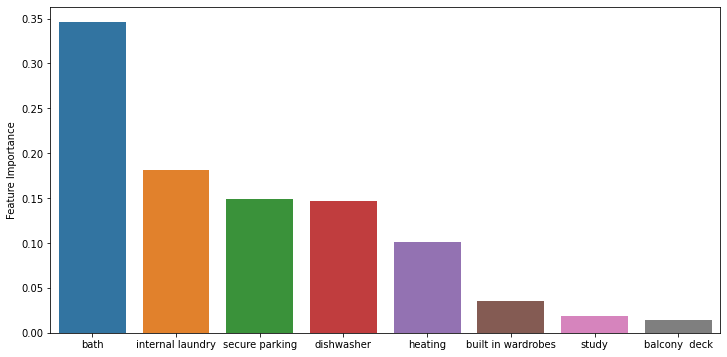

In [145]:
plt.figure(figsize=(12,6))
feat_import_plot = sns.barplot(y=feature_imp["Feature Importance"][0:8], x=feature_imp.index[0:8])

In [146]:
# These seem to be the most relevant additional features which are listed on domain 
# We want to save these for summary notebook:
fig = feat_import_plot.get_figure()
fig.savefig("../plots/feat_import_plot.png") 